### Text Clustering with kMeans

### Load Data

In our example below we are using the 20newsgroup dataset that is available in Scikit-learn datasets. This dataset consists article of 20 groups but in our example, we are filtering only for two categories soc.religion.christian and comp.graphics. Lets load dataset for train and test data.

In [1]:
from sklearn.datasets import fetch_20newsgroups

categories = ['soc.religion.christian',
              'comp.graphics']
# Load Data
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Check number of records in training and testing data
len(twenty_train.data),len(twenty_test.data)

(1183, 787)

In [4]:
twenty_test.data[0]

'From: dan@ingres.com (a Rose arose)\nSubject: Re: earthquake prediction\nOrganization: Representing my own views here.\nLines: 75\n\nmserv@mozart.cc.iup.edu (Mail Server) writes:\n: Ok, a few days back, the below-included message was posted stating: \n: \n: >     I believe with everything in my heart that on May 3, 1993, the city of\n: >Portland, Oregon in the country of the United States of America will be hit\n: >with a catastrophic and disastrous earthquake...\n: \n: By now, we know that this did not come to pass....\n: \n: ...I don\'t think it\'s particularly \n: glorifying to God to say things like "Well, I THINK the Lord is telling me...", \n: ..Such statements seem to me to be an attempt to get a spiritual thrill should \n: the guess happen to come true, without risking the guilt of false prophecy \n: should it fail to come to pass.  I do not believe genuine prophecy was ever \n: like this.  Comments?\n: \n\nI agree.   People should not be misled to believe "thus sayeth the Lor

### Generate the features using TF-IDF vectorization

In [2]:
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(twenty_train.data)

# Check Shape of Count Vector
X_train_counts.shape

(1183, 22690)

### perform k-means clustering

In [5]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=2).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

### Evaluate Clustering Performance

First, we can evaluate the clustering using Davies-Bouldin Index and Silhouette Score. 

In [7]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(X_train_counts.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_train_counts.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

DBI Score:  9.80806917673569 
Silhoutte Score:  0.00798729984611275


Now Evaluate Clustering Performance using WordCloud

In [8]:
# Import WordCloud and STOPWORDS
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Import matplotlib
import matplotlib.pyplot as plt 


def word_cloud(text,wc_title,wc_file_name='wordcloud.jpeg'):
    # Create stopword list
    stopword_list = set(STOPWORDS) 

    # Create WordCloud 
    word_cloud = WordCloud(width = 800, height = 500, 
                           background_color ='white', 
                           stopwords = stopword_list, 
                           min_font_size = 14).generate(text) 

    # Set wordcloud figure size
    plt.figure(figsize = (8, 6)) 
    
    # Set title for word cloud
    plt.title(wc_title)
    
    # Show image
    plt.imshow(word_cloud) 

    # Remove Axis
    plt.axis("off")  

    # save word cloud
    plt.savefig(wc_file_name,bbox_inches='tight')

    # show plot
    plt.show()

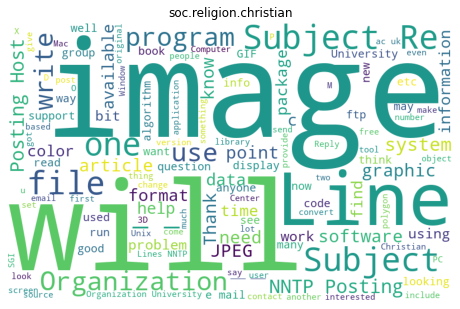

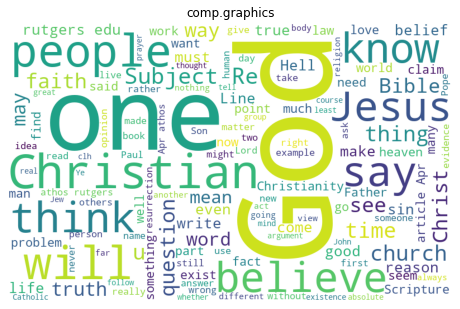

In [9]:
import pandas as pd
df=pd.DataFrame({"text":twenty_train.data,"labels":pred_labels})


for i in df.labels.unique():
    new_df=df[df.labels==i]
    text="".join(new_df.text.tolist())
    word_cloud(text,twenty_train.target_names[i], twenty_train.target_names[i]+'.jpeg')

Reference: https://machinelearninggeek.com/text-clustering-clustering-news-articles/